In [9]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist
from matplotlib import pyplot as plt
import numpy as np

## Train CNN using TFLearn

In [4]:
X, Y, test_x, test_y = mnist.load_data(one_hot=True)

X = X.reshape([-1, 28, 28, 1])
test_x = test_x.reshape([-1, 28, 28, 1])

convnet = input_data(shape=[None, 28, 28, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet)
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id='mnist')

Training Step: 8599  | total loss: 0.07308 | time: 118.256s
| Adam | epoch: 010 | loss: 0.07308 - acc: 0.9866 -- iter: 54976/55000
Training Step: 8600  | total loss: 0.07088 | time: 124.174s
| Adam | epoch: 010 | loss: 0.07088 - acc: 0.9864 | val_loss: 0.06737 - val_acc: 0.9832 -- iter: 55000/55000
--


## Save Trained Model

In [5]:
model.save('modelCnnTFlearn.model')

INFO:tensorflow:E:\Course\AI_Basics\Tensorflow\modelCnnTFlearn.model is not in all_model_checkpoint_paths. Manually adding it.


## Load Trained model

In [6]:
model.load('modelCnnTFlearn.model')

INFO:tensorflow:Restoring parameters from E:\Course\AI_Basics\Tensorflow\modelCnnTFlearn.model


## Predict Using Trained Model

To predict having the model graph in memory is necessary. Network Grapg is all the code "convenet.....".

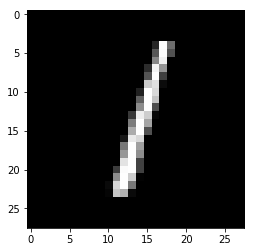

Predicted:  1


In [13]:
def print_test_image(image_index):
    image = test_x[image_index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

image_index = 2
print_test_image(image_index)
print("Predicted: ",np.argmax(np.round(model.predict([test_x[image_index]])[0]) ))